## Preface to robustness discussion
#### Note: using MitoCaller with a depth threshold of 10 is used as the baseline; any other depth threshold is compared solely to this baseline
* Defining "robustness"
  
  A robust method of calling homoplasmies should minimize the requirement for high quality samples while maximizing the HaploGrep quality score. A high quality sample is characterized by: (1) a high average per-base coverage; and (2) a high percentage of bases covered to >10x.
  
  Since only 43/100 samples in this cohort are covered to 10x over >41% of bases, and only 43/100 samples have average per-base coverage >100x,
  it would be safe to assume that over half of all ADSP samples are of "low quality."
  
  Therefore: a robust method for calling homoplasmies is necessary to reliably and accurately classify a WES sample using HaploGrep.
  
  
* Metrics of Success
  
  A robust method of calling homoplasmies should divorce the high-quality HaploGrep output from the required sample-specific measurements of coverage.
  Several ways that this can be represented include:
  1. a decrease in Pearson correlation coefficient
  2. a linear regression with a slope close to 0
  3. a significant Pearson correlation coefficient close to 1 for comparing the number of called homoplasmies to the expected total number
  
  By comparing several trials with different depth thresholds for calling homoplasmies, we should be able to visualize a pattern. I expect, judging from previous analysis, that as the depth threshold for calling homoplasmies is lowered towards 0, the requirement for high quality samples in order to get high quality HaploGrep outputs will be lessened. The above metrics of success are visualized below.
  
  
* Intermediate goal
  
  An intermediate step in verifying robustness is to measure the correlation between number of homoplasmies and the quality of HaploGrep output.
  * The number of homoplasmies called will increase when decreasing the depth threshold of MitoCaller.
  * Introducing noise into the sample via inaccurately called homoplasmies will decrease the quality of the HaploGrep output.
  * However: almost paradoxically, HaploGrep's classification algorithm may become more accurate when provided with more homoplasmies.
  * There are several factors which must be weighted in classification: depth of haplogroup on the PhyloTree; sample concordence with expected homoplasmies; combinatorial advantage of calling homoplasmies together.
  
  What this means is that divorcing HaploGrep quality from the number of called homoplasmies should help control for noise in the sample. Using an abstract/over-simplified signal like HaploGrep classification "quality" - which itself is a weighted measurement - requires controlling for sample-specific values like coverage and number of called homoplasmies.
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import seaborn as sns
%matplotlib inline

In [2]:
# read in data
first100_analysis_depthre0 = pd.read_csv("first100_analysis.tsv", sep='\t')
first100_analysis_depthre5 = pd.read_csv("first100_analysis_depthre5.tsv", sep='\t')

### Scatter Plot of Average Coverage versus Number of Called Homoplasmies

Depthre10:	 (0.52968586493763403, 1.4561737127606019e-08)
Depthre5:	 (0.3891249830190045, 6.301722528732918e-05)
Depthre0:	 (-0.051524002044537928, 0.61068175912533085)


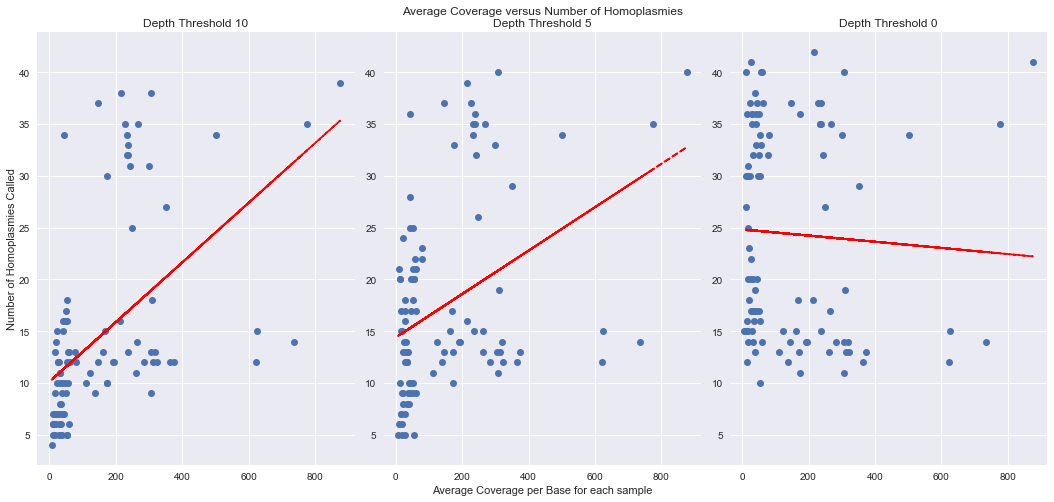

In [3]:
# three subplots (1 row, 3 col)
fig = plt.figure(figsize=(15,7.5))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, sharex=ax1, sharey=ax1) # share the axes
ax3 = fig.add_subplot(133, sharex=ax1, sharey=ax1) # share the axes

ax.set_title("Average Coverage versus Number of Homoplasmies\n")

ax1.plot(first100_analysis_depthre0.avg_cov, first100_analysis_depthre0.depthre10_NF, "o")
x = np.array(first100_analysis_depthre0.avg_cov, dtype=float)
y = np.array(first100_analysis_depthre0.depthre10_NF, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"r--") # line of best fit

ax2.plot(first100_analysis_depthre0.avg_cov, first100_analysis_depthre5.depthre5_NF, "o")
x = np.array(first100_analysis_depthre0.avg_cov, dtype=float)
y = np.array(first100_analysis_depthre5.depthre5_NF, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x,p(x),"r--") # line of best fit

ax3.plot(first100_analysis_depthre0.avg_cov, first100_analysis_depthre0.depthre0_NF, "o")
x = np.array(first100_analysis_depthre0.avg_cov, dtype=float)
y = np.array(first100_analysis_depthre0.depthre0_NF, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax3.plot(x,p(x),"r--") # line of best fit

ax.get_xaxis().set_ticks([]) # get rid of auto-ticks
ax.get_yaxis().set_ticks([])

ax1.set_title("Depth Threshold 10")
ax2.set_title("Depth Threshold 5")
ax3.set_title("Depth Threshold 0")
ax.set_xlabel("Average Coverage per Base for each sample", labelpad=20)
ax.set_ylabel("Number of Homoplasmies Called", labelpad=20)
fig.tight_layout()
plt.tight_layout()

print("Depthre10:\t", pearsonr(first100_analysis_depthre0.avg_cov, first100_analysis_depthre0.depthre10_NF))
print("Depthre5:\t", pearsonr(first100_analysis_depthre0.avg_cov, first100_analysis_depthre5.depthre5_NF))
print("Depthre0:\t", pearsonr(first100_analysis_depthre0.avg_cov, first100_analysis_depthre0.depthre0_NF))

#### Results: Significant Pearson correlation coefficients for both depth thresholds of 10 and 5; slope of linear regression for depth threshold 0 trial is closer to 0, and the correlation coefficient is insignificant
#### Conclusion: Calling homoplasmies with a depth threshold of 0 is capable of divorcing the sample-specific value of average per-base coverage from number of homoplasmies called

### Scatter Plot of Number of Called Homoplasmies versus Haplogroup Quality

Depthre10:	 (0.61436840260368164, 1.0579936037397041e-11)
Depthre5:	 (0.47214723349908261, 7.0771120887790096e-07)
Depthre0:	 (0.16960036018376853, 0.091617775416967431)


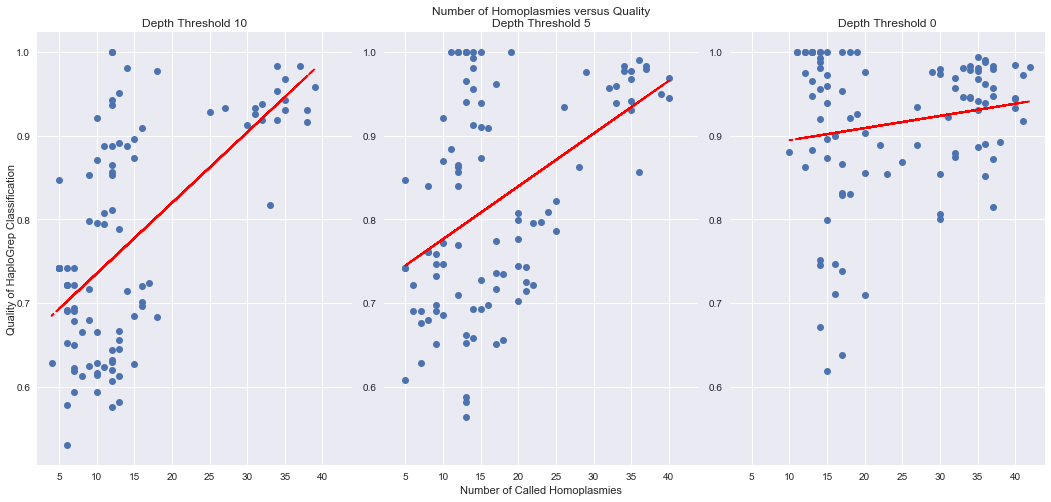

In [4]:
fig = plt.figure(figsize=(15,7.5))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(133, sharex=ax1, sharey=ax1)

ax.set_title("Number of Homoplasmies versus Quality\n")

ax1.plot(first100_analysis_depthre0.depthre10_NF, first100_analysis_depthre0.depthre10_rank, 'o')
x = np.array(first100_analysis_depthre0.depthre10_NF, dtype=float)
y = np.array(first100_analysis_depthre0.depthre10_rank, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"r--")

ax2.plot(first100_analysis_depthre5.depthre5_NF, first100_analysis_depthre5.depthre5_rank, 'o')
x = np.array(first100_analysis_depthre5.depthre5_NF, dtype=float)
y = np.array(first100_analysis_depthre5.depthre5_rank, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x,p(x),"r--")

ax3.plot(first100_analysis_depthre0.depthre0_NF, first100_analysis_depthre0.depthre0_rank, 'o')
x = np.array(first100_analysis_depthre0.depthre0_NF, dtype=float)
y = np.array(first100_analysis_depthre0.depthre0_rank, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax3.plot(x,p(x),"r--")

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax1.set_title("Depth Threshold 10")
ax2.set_title("Depth Threshold 5")
ax3.set_title("Depth Threshold 0")
ax.set_xlabel("Number of Called Homoplasmies", labelpad=20)
ax.set_ylabel("Quality of HaploGrep Classification", labelpad=20)
fig.tight_layout()
plt.tight_layout()

print("Depthre10:\t", pearsonr(first100_analysis_depthre0.depthre10_NF, first100_analysis_depthre0.depthre10_rank))
print("Depthre5:\t", pearsonr(first100_analysis_depthre5.depthre5_NF, first100_analysis_depthre5.depthre5_rank))
print("Depthre0:\t", pearsonr(first100_analysis_depthre0.depthre0_NF, first100_analysis_depthre0.depthre0_rank))

#### Results: Significant Pearson correlation coefficients for both depth thresholds of 10 and 5; slope of linear regression for depth threshold 0 trial is closer to 0, and the correlation coefficient is insignificant
#### Results: Samples have migrated to higher HaploGrep classification quality when more homoplasmies are called
#### Conclusion: Calling homoplasmies with a depth threshold of 0 is capable of divorcing the number of homoplasmies called from HaploGrep quality

### Correlation between the % of bases covered to >10x and the quality of the HaploGrep classification

Depthre10:	 (0.85986944151325806, 2.2595346693888647e-30)
Depthre5:	 (0.85622265262356345, 7.2572397981073294e-30)
Depthre0:	 (0.52651615172048294, 1.8384468998075556e-08)


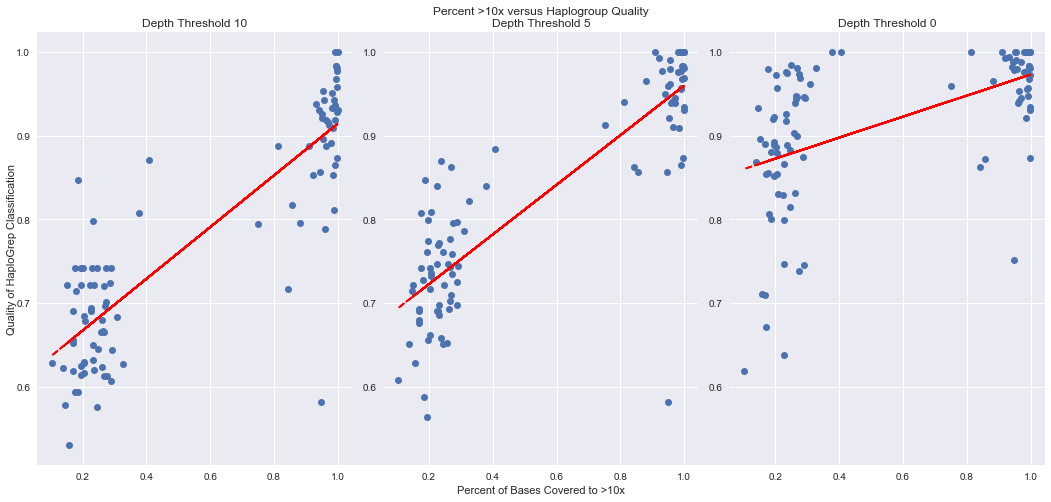

In [5]:
fig = plt.figure(figsize=(15,7.5))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(133, sharex=ax1, sharey=ax1)

ax.set_title("Percent >10x versus Haplogroup Quality\n")

ax1.plot(first100_analysis_depthre0.percent_greater10x, first100_analysis_depthre0.depthre10_rank, 'o')
x = np.array(first100_analysis_depthre0.percent_greater10x, dtype=float)
y = np.array(first100_analysis_depthre0.depthre10_rank, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax1.plot(x,p(x),"r--")

ax2.plot(first100_analysis_depthre0.percent_greater10x, first100_analysis_depthre5.depthre5_rank, 'o')
x = np.array(first100_analysis_depthre0.percent_greater10x, dtype=float)
y = np.array(first100_analysis_depthre5.depthre5_rank, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x,p(x),"r--")

ax3.plot(first100_analysis_depthre0.percent_greater10x, first100_analysis_depthre0.depthre0_rank, 'o')
x = np.array(first100_analysis_depthre0.percent_greater10x, dtype=float)
y = np.array(first100_analysis_depthre0.depthre0_rank, dtype=float)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax3.plot(x,p(x),"r--")

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax1.set_title("Depth Threshold 10")
ax2.set_title("Depth Threshold 5")
ax3.set_title("Depth Threshold 0")
ax.set_xlabel("Percent of Bases Covered to >10x", labelpad=20)
ax.set_ylabel("Quality of HaploGrep Classification", labelpad=20)
fig.tight_layout()
plt.tight_layout()

print("Depthre10:\t", pearsonr(first100_analysis_depthre0.percent_greater10x, first100_analysis_depthre0.depthre10_rank))
print("Depthre5:\t", pearsonr(first100_analysis_depthre5.percent_greater10x, first100_analysis_depthre5.depthre5_rank))
print("Depthre0:\t", pearsonr(first100_analysis_depthre0.percent_greater10x, first100_analysis_depthre0.depthre0_rank))

#### Results: smaller correlation coefficient for samples with homoplasmies called with a depth threshold of 0; negligible change in R for 10 and 5
#### Results: In the trial with depth threshold of 0, samples have migrated to higher HaploGrep classification quality despire the unchanging percent bases covered to >10x
#### Conclusions: samples with homoplasmies called on a depth threshold of 0 are less reliant on the percentage of bases covered to >10x to get a better HaploGrep quality unlike the those called on a depth threshold of 10 or 5

### Swarm Plots: a visual representation of a pivot table

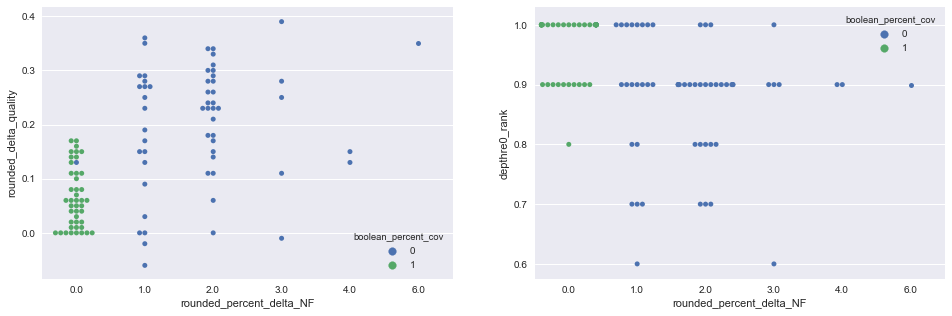

In [6]:
first100_analysis_depthre0_supp = pd.DataFrame([first100_analysis_depthre0.sampleID, first100_analysis_depthre0.sampleID, first100_analysis_depthre0.sampleID, first100_analysis_depthre0.sampleID, first100_analysis_depthre0.depthre0_rank])
first100_analysis_depthre0_supp = first100_analysis_depthre0_supp.T
first100_analysis_depthre0_supp.columns = ['sampleID', 'rounded_percent_delta_NF', 'rounded_delta_quality', 'boolean_percent_cov', 'depthre0_rank']

first100_analysis_depthre0_percent_cov_copy = np.array(first100_analysis_depthre0.percent_greater10x, dtype='object')
first100_analysis_depthre0_percent_cov_copy[first100_analysis_depthre0_percent_cov_copy < 0.41] = 0
first100_analysis_depthre0_percent_cov_copy[first100_analysis_depthre0_percent_cov_copy > 0.75] = 1
first100_analysis_depthre0_supp.boolean_percent_cov = first100_analysis_depthre0_percent_cov_copy

delta_quality = first100_analysis_depthre0.depthre0_rank - first100_analysis_depthre0.depthre10_rank
first100_analysis_depthre0_supp.rounded_delta_quality = round(delta_quality,2)

delta_NF = first100_analysis_depthre0.depthre0_NF - first100_analysis_depthre0.depthre10_NF
first100_analysis_depthre0_supp.rounded_percent_delta_NF = round(delta_NF/first100_analysis_depthre0.depthre10_NF,0)

first100_analysis_depthre0_supp.depthre0_rank = round(first100_analysis_depthre0_supp.depthre0_rank.astype(np.double),1)

fig = plt.figure(figsize=(25,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

sns.swarmplot(x='rounded_percent_delta_NF', y='rounded_delta_quality', hue='boolean_percent_cov', data=first100_analysis_depthre0_supp, ax=ax1)
sns.swarmplot(x='rounded_percent_delta_NF', y='depthre0_rank', hue='boolean_percent_cov', data=first100_analysis_depthre0_supp, ax=ax2)

### Are we finding all of the "missing" homoplasmies?
* Methods: take the number of called homoplasmies from MitoCaller with a depth threshold of 10; divide by the % bases covered to > 10x to estimate the total number of expected homoplasmies
* How does this number correlate with the number of called homoplasmies from MitoCaller with a depth threshold of 0?

In [7]:
depthre10_NF_copy = first100_analysis_depthre0.depthre10_NF
estimated_true_NF = depthre10_NF_copy / first100_analysis_depthre0.percent_greater10x
print("Depth Threshold 10: ", pearsonr(estimated_true_NF, first100_analysis_depthre0.depthre10_NF))
print("Depth Threshold 5: ", pearsonr(estimated_true_NF, first100_analysis_depthre5.depthre5_NF))
print("Depth Threshold 0: ", pearsonr(estimated_true_NF, first100_analysis_depthre0.depthre0_NF))

Depth Threshold 10:  (0.11193472253119638, 0.2675324896946436)
Depth Threshold 5:  (0.25327226188907687, 0.011006944598867441)
Depth Threshold 0:  (0.72904384860791638, 8.0031807965766471e-18)


#### Results: Samples with homoplasmies called using a depth threshold of 0 significantly correlate at a high rate (R=0.729, p=8e-18)
#### Conclusion: Calling homoplasmies with a depth threshold of 0 is the best (of these three methods) at finding the most "missing" variants

### Plot quality against quality
#### Interpretation: samples below the line x=y, the depth threshold on the x-axis has higher quality than the depth threshold on the y-axis; sameples above the line x=y, the depth threshold on the y-axis has higher quality than the depth threshold on the x-axis

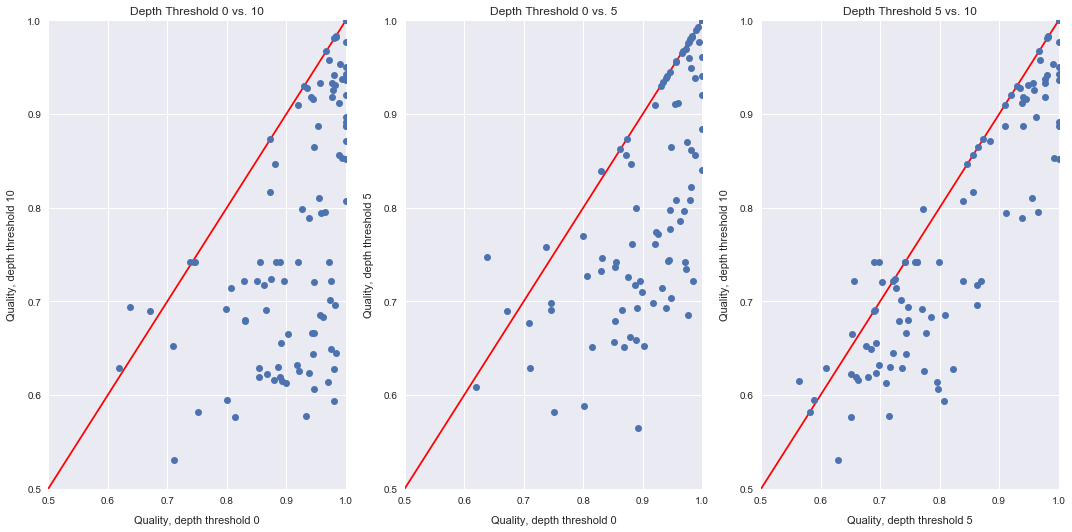

In [8]:
fig = plt.figure(figsize=(15,7.5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

x = [0,1]
y = [0,1]
ax1.plot(x,y, 'r-')
ax2.plot(x,y, 'r-')
ax3.plot(x,y, 'r-')

ax1.plot(first100_analysis_depthre0.depthre0_rank, first100_analysis_depthre0.depthre10_rank, 'o')
ax2.plot(first100_analysis_depthre0.depthre0_rank, first100_analysis_depthre5.depthre5_rank, 'o')
ax3.plot(first100_analysis_depthre5.depthre5_rank, first100_analysis_depthre0.depthre10_rank, 'o')

ax1.set_ylim([0.5,1])
ax1.set_xlim([0.5,1])
ax2.set_ylim([0.5,1])
ax2.set_xlim([0.5,1])
ax3.set_ylim([0.5,1])
ax3.set_xlim([0.5,1])

ax1.set_title("Depth Threshold 0 vs. 10")
ax2.set_title("Depth Threshold 0 vs. 5")
ax3.set_title("Depth Threshold 5 vs. 10")

ax1.set_xlabel("Quality, depth threshold 0", labelpad=10)
ax1.set_ylabel("Quality, depth threshold 10", labelpad=10)

ax2.set_xlabel("Quality, depth threshold 0", labelpad=10)
ax2.set_ylabel("Quality, depth threshold 5", labelpad=10)

ax3.set_xlabel("Quality, depth threshold 5", labelpad=10)
ax3.set_ylabel("Quality, depth threshold 10", labelpad=10)

fig.tight_layout()
plt.tight_layout()

#### Results: Subplot 1: depth threshold of 0 outperforms the default MitoCaller depth threshold of 10 for all but four samples; Subplot 2: depth threshold of 0 outperforms the depth threshold of 5 for all but four samples; Subplot 3: depth threshold of 5 outperforms the default MitoCaller depth threshold of 10 for all but 9 samples
#### Conclusions: calling homoplasmies with a depth threshold of 10 is outperformed by a depth threshold of 5 and 0; calling homoplasmies with a depth threshold of 5 is outperformed by a depth threshold of 0. By observation: using a depth threshold of 0 appears to increase the improvement in quality than using 5 (more samples are toward the right of the plot when comparing subplots 1 and 3).